In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('Base Limpia.xlsx')

In [3]:
df = df.drop('Unnamed: 0', axis = 1)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
399164,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,0
399165,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,0
399166,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,0
399167,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,0


In [4]:
df.shape

(399169, 9)

In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.set_index('InvoiceDate')
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,order_canceled
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,0
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,0
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,0
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,0
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,0


In [6]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,order_canceled,Sales
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,0,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,0,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,0,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,0,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,0,20.34


In [8]:
total_uk = df['Country'].loc[df['Country'] == 'United Kingdom'].count()
total_paises = df['Country'].count()
porcentaje_uk = total_uk/total_paises
print(str('{0:.2f}%').format(porcentaje_uk*100))

89.10%


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = df[df['Quantity'] > 0]
df.describe()

,Quantity,UnitPrice,CustomerID,order_canceled,Sales
count,390688.000000,390688.000000,390688.000000,390688.0,390688.000000
mean,11.840062,2.873597,15294.729183,0.0,20.786267
std,26.052924,4.283021,1710.124903,0.0,82.681480
min,1.000000,0.001000,12347.000000,0.0,0.001000
25%,2.000000,1.250000,13969.000000,0.0,4.950000
50%,6.000000,1.950000,15157.000000,0.0,11.900000
75%,12.000000,3.750000,16794.000000,0.0,19.800000
max,540.000000,649.500000,18287.000000,0.0,38970.000000


In [18]:
df_ts = df[['Sales']]
df_ts.head()

,Sales
InvoiceDate,
2010-12-01 08:26:00,15.30
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,22.00
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,20.34


<Figure size 1296x432 with 0 Axes>

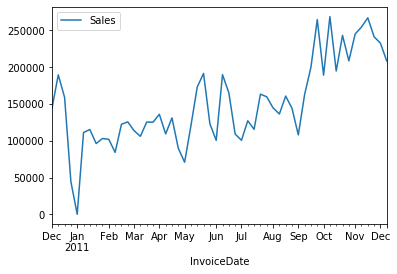

In [19]:
plt.figure(figsize=(18,6))
df_resample = df_ts.resample('W').sum()
df_resample.plot()

In [20]:
df_resample['01-2011']

,Sales
InvoiceDate,
2011-01-02,0.00
2011-01-09,111199.05
2011-01-16,115341.78
2011-01-23,96230.88
2011-01-30,103115.20


Se ve que cuando las ventas bajaron fue porque fue año nuevo

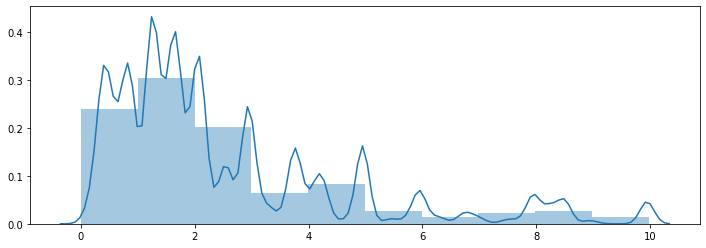

In [22]:
plt.figure(figsize=(12,4))
sns.distplot(df[df['UnitPrice'] < 10]['UnitPrice'].values, kde=True, bins=10)

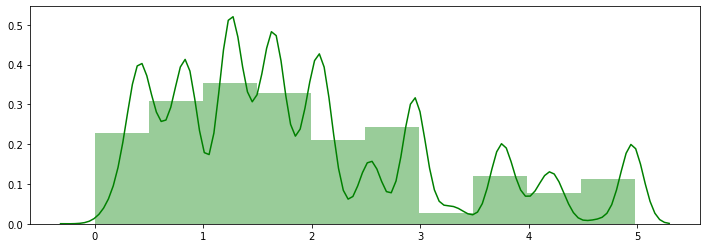

In [18]:
plt.figure(figsize=(12,4))
sns.distplot(df[df['UnitPrice'] < 5]['UnitPrice'].values, kde=True, bins=10, color='green')

Vemos que la mayoria de los articulos que se venden oscilan en el intervalo (0,3)

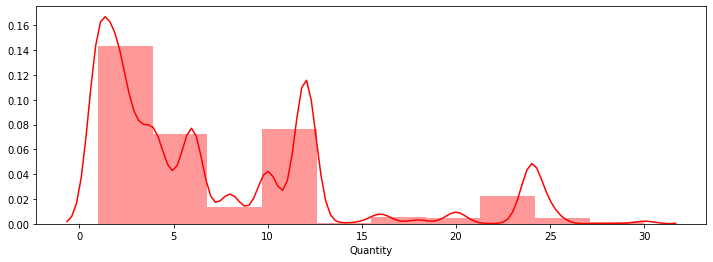

In [19]:
plt.figure(figsize=(12,4))
sns.distplot(df[df['Quantity'] <= 30]['Quantity'], kde=True, bins=10, color='red')

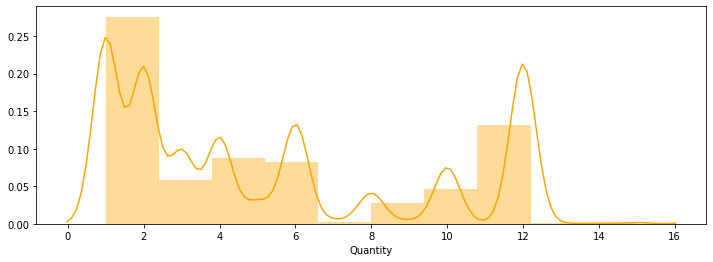

In [20]:
plt.figure(figsize=(12,4))
sns.distplot(df[df['Quantity'] <= 15]['Quantity'], kde=True, bins=10, color='orange')

Vemos que la gente normalmente compra entre (1,6) o (10,13) articulos, debe haber algo ahi.

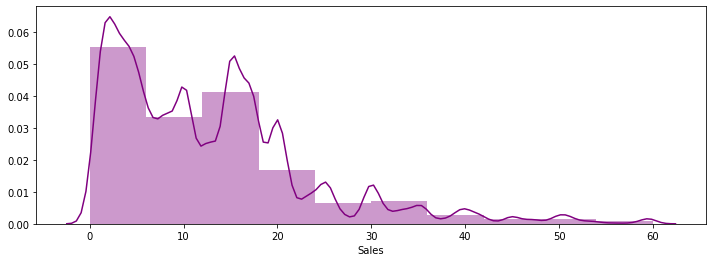

In [21]:
plt.figure(figsize=(12,4))
sns.distplot(df[df['Sales'] < 60]['Sales'], kde=True, bins=10, color='purple')

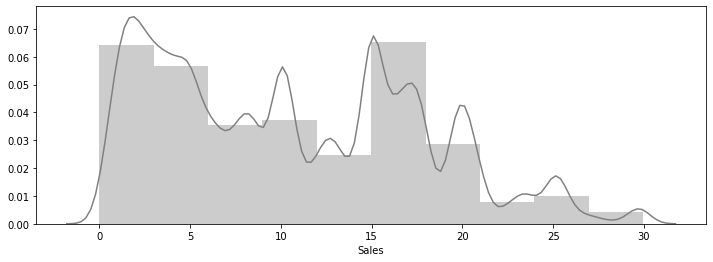

In [22]:
plt.figure(figsize=(12,4))
sns.distplot(df[df['Sales'] < 30]['Sales'], kde=True, bins=10, color='grey')

La mayor parte de las ventas se encontraron entre 1 y 15 libras, despues, se ve un decremento.

Vemos que hay un cero, al revisar la fecha vemos que fue en el cambio del año, por lo que posiblemente la gente no quiso comprar hasta unos dias despues o la tienda estaba cerrada

### Modelación

In [23]:
df_join = df.groupby('InvoiceNo')[['Quantity']].sum()

In [24]:
df_join = df_join.reset_index()
df_join.head()

,InvoiceNo,Quantity
0,536365,40
1,536366,12
2,536367,83
3,536368,15
4,536369,3


In [25]:
df['InvoiceDate'] = df.index
df = df.merge(df_join, how='left', on='InvoiceNo')
df = df.rename(columns={'Quantity_x' : 'Quantity', 'Quantity_y' : 'QuantityInv'})
df.tail(15)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,order_canceled,Sales,InvoiceDate,QuantityInv
390673,581587,22631,CIRCUS PARADE LUNCH BOX,12,1.95,12680,France,0,23.40,2011-12-09 12:50:00,105
390674,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,1.65,12680,France,0,19.80,2011-12-09 12:50:00,105
390675,581587,22555,PLASTERS IN TIN STRONGMAN,12,1.65,12680,France,0,19.80,2011-12-09 12:50:00,105
390676,581587,22728,ALARM CLOCK BAKELIKE PINK,4,3.75,12680,France,0,15.00,2011-12-09 12:50:00,105
390677,581587,22727,ALARM CLOCK BAKELIKE RED,4,3.75,12680,France,0,15.00,2011-12-09 12:50:00,105
390678,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,3.75,12680,France,0,15.00,2011-12-09 12:50:00,105
390679,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,3.75,12680,France,0,15.00,2011-12-09 12:50:00,105
390680,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,1.95,12680,France,0,15.60,2011-12-09 12:50:00,105
390681,581587,22629,SPACEBOY LUNCH BOX,12,1.95,12680,France,0,23.40,2011-12-09 12:50:00,105
390682,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,4.15,12680,France,0,16.60,2011-12-09 12:50:00,105


In [26]:
df.describe()

,Quantity,UnitPrice,CustomerID,order_canceled,Sales,QuantityInv
count,390688.000000,390688.000000,390688.000000,390688.0,390688.000000,390688.000000
mean,11.840062,2.873597,15294.729183,0.0,20.786267,422.060342
std,26.052924,4.283021,1710.124903,0.0,82.681480,813.016148
min,1.000000,0.001000,12347.000000,0.0,0.001000,1.000000
25%,2.000000,1.250000,13969.000000,0.0,4.950000,133.000000
50%,6.000000,1.950000,15157.000000,0.0,11.900000,238.000000
75%,12.000000,3.750000,16794.000000,0.0,19.800000,431.000000
max,540.000000,649.500000,18287.000000,0.0,38970.000000,14730.000000


In [27]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

Como vimos con las graficas de colores, podemos agrupar ciertas cosas

In [28]:
intervalos_QR = pd.IntervalIndex.from_tuples([(0, 2), (2, 5), (5, 8), (8, 11), (11, 14), (15, 4900)])
df['QuantityRange'] = pd.cut(df['Quantity'], bins=intervalos_QR)
intervalos_PR = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, 3), (3, 4), (4, 18)])
df['PriceRange'] = pd.cut(df['UnitPrice'], bins=intervalos_PR)
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,order_canceled,Sales,InvoiceDate,QuantityInv,QuantityRange,PriceRange
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,0,15.30,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]"
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,0,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,0,22.00,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,0,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,0,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]"


Como vimos en la grafica donde llega a 0 en enero, vemos que los meses si importan

In [29]:
df['Month'] = df['InvoiceDate'].dt.month
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,order_canceled,Sales,InvoiceDate,QuantityInv,QuantityRange,PriceRange,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,0,15.30,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]",12
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,0,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,0,22.00,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]",12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,0,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,0,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12


In [30]:
bandasDR = pd.IntervalIndex.from_tuples([(0,3),(3,6),(6,9),(9,12)])
df['DateRange'] = pd.cut(df['Month'], bins=bandasDR, labels=['q1','q2','q3','q4'])
df.tail()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,order_canceled,Sales,InvoiceDate,QuantityInv,QuantityRange,PriceRange,Month,DateRange
390683,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,0,10.20,2011-12-09 12:50:00,105,"(11, 14]","(0, 1]",12,"(9, 12]"
390684,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,0,12.60,2011-12-09 12:50:00,105,"(5, 8]","(2, 3]",12,"(9, 12]"
390685,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,0,16.60,2011-12-09 12:50:00,105,"(2, 5]","(4, 18]",12,"(9, 12]"
390686,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,France,0,16.60,2011-12-09 12:50:00,105,"(2, 5]","(4, 18]",12,"(9, 12]"
390687,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680,France,0,14.85,2011-12-09 12:50:00,105,"(2, 5]","(4, 18]",12,"(9, 12]"


### Construcción del modelo

In [31]:
uk_count = df['Country'].loc[df['Country'] == 'United Kingdom'].count()
all_count = df['Country'].count()
uk_perc = uk_count/all_count
print(str('{0:.2f}%').format(uk_perc*100))

89.19%


Vemos que siguen predominando los envios a UK, por lo que haremos UK y NoUK

In [33]:
df_UK = df[df['Country'] == 'United Kingdom']
df_NoUK = df[df['Country'] != 'United Kingdom']

In [34]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,order_canceled,Sales,InvoiceDate,QuantityInv,QuantityRange,PriceRange,Month,DateRange
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,0,15.30,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]",12,"(9, 12]"
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,0,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12,"(9, 12]"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,0,22.00,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]",12,"(9, 12]"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,0,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12,"(9, 12]"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,0,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]",12,"(9, 12]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390683,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,0,10.20,2011-12-09 12:50:00,105,"(11, 14]","(0, 1]",12,"(9, 12]"
390684,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,0,12.60,2011-12-09 12:50:00,105,"(5, 8]","(2, 3]",12,"(9, 12]"
390685,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,0,16.60,2011-12-09 12:50:00,105,"(2, 5]","(4, 18]",12,"(9, 12]"
390686,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,France,0,16.60,2011-12-09 12:50:00,105,"(2, 5]","(4, 18]",12,"(9, 12]"


In [35]:
from sklearn.linear_model import LinearRegression,PassiveAggressiveRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error

In [37]:
y = df['Sales']
X = df.drop(columns=['Sales'])

In [38]:
sc = MinMaxScaler()

In [47]:
X1 = X[['Quantity','UnitPrice','order_canceled','QuantityInv','Month']]

In [46]:
pd.get_dummies(X1[['QuantityRange','PriceRange','DateRange']])

,"QuantityRange_(0, 2]","QuantityRange_(2, 5]","QuantityRange_(5, 8]","QuantityRange_(8, 11]","QuantityRange_(11, 14]","QuantityRange_(15, 4900]","PriceRange_(0, 1]","PriceRange_(1, 2]","PriceRange_(2, 3]","PriceRange_(3, 4]","PriceRange_(4, 18]","DateRange_(0, 3]","DateRange_(3, 6]","DateRange_(6, 9]","DateRange_(9, 12]"
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390683,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
390684,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
390685,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
390686,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [48]:
Xs = pd.DataFrame(sc.fit_transform(X1))

In [49]:
Xs.describe()

,0,1,2,3,4
count,390688.000000,390688.000000,390688.0,390688.000000,390688.000000
mean,0.020111,0.004423,0.0,0.028587,0.600238
std,0.048336,0.006594,0.0,0.055198,0.310449
min,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.001855,0.001923,0.0,0.008962,0.363636
50%,0.009276,0.003001,0.0,0.016091,0.636364
75%,0.020408,0.005772,0.0,0.029194,0.909091
max,1.000000,1.000000,0.0,1.000000,1.000000


In [50]:
Xt,Xv,yt,yv = train_test_split(Xs,y,train_size=0.7)

Xt.shape,Xv.shape

modelo = LinearRegression()

modelo.fit(Xt,yt)

print(mean_absolute_error(y_pred=modelo.predict(Xt),y_true=yt))
print(mean_absolute_error(y_pred=modelo.predict(Xv),y_true=yv))

14.354024355676156
14.311250135851447


In [51]:
param = dict(C=np.arange(0,1,0.01))

In [52]:
modelo_pa = PassiveAggressiveRegressor()

In [53]:
grid = GridSearchCV(param_grid=param,cv=3,estimator=modelo_pa,n_jobs=-1,
                    error_score='mean_absolute_error',verbose=True)

In [54]:
grid.fit(Xt,yt)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.1min finished


GridSearchCV(cv=3, error_score='mean_absolute_error',
             estimator=PassiveAggressiveRegressor(C=1.0, average=False,
                                                  early_stopping=False,
                                                  epsilon=0.1,
                                                  fit_intercept=True,
                                                  loss='epsilon_insensitive',
                                                  max_iter=1000,
                                                  n_iter_no_change=5,
                                                  random_state=None,
                                                  shuffle=True, tol=0.001,
                                                  validation_fraction=0.1,
                                                  verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C'...
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.5

In [55]:
grid.best_score_

0.34299970899578736

In [56]:
grid.best_params_

{'C': 0.9500000000000001}

In [57]:
modelo_pa = grid.best_estimator_

In [58]:
modelo_pa.fit(Xt,yt)

PassiveAggressiveRegressor(C=0.9500000000000001, average=False,
                           early_stopping=False, epsilon=0.1,
                           fit_intercept=True, loss='epsilon_insensitive',
                           max_iter=1000, n_iter_no_change=5, random_state=None,
                           shuffle=True, tol=0.001, validation_fraction=0.1,
                           verbose=0, warm_start=False)

In [59]:
print(mean_absolute_error(y_pred=modelo_pa.predict(Xt),y_true=yt))
print(mean_absolute_error(y_pred=modelo_pa.predict(Xv),y_true=yv))

10.676965448946142
10.612186452960744


In [60]:
df['y^'] = modelo.predict(Xs)

C:\Users\Josías\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:178: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  args=endog)[0] for i in range(1, gridsize)]


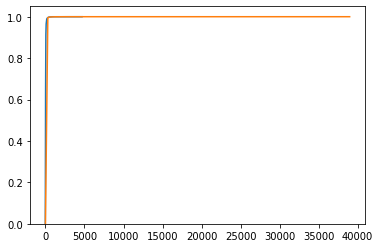

In [61]:
sns.distplot(df[['y^']],hist=False,kde_kws={'cumulative':True})
sns.distplot(df[['Sales']],hist=False,kde_kws={'cumulative':True})

In [62]:
df[['Sales','y^']].sample(10)

,Sales,y^
188984,9.75,3.805152
15825,9.90,3.877387
338610,14.67,10.349964
348848,15.80,18.606342
205887,15.00,9.525947
158208,12.75,74.180283
29717,12.50,5.270715
181208,7.65,5.646298
2150,35.40,22.663637
101755,3.40,-5.900956
